<a href="https://colab.research.google.com/github/SanjayBista1010/Classification/blob/main/HeartDiseaseRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('heart_disease.csv')
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [96]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [97]:
df['cholesterol'].value_counts()

,count
cholesterol,
0,172
254,16
211,13
204,13
234,13
...,...
316,1
278,1
157,1


In [98]:
df['resting bp s'].value_counts()

,count
resting bp s,
120,166
130,149
140,137
110,76
150,73
...,...
0,1
185,1
96,1


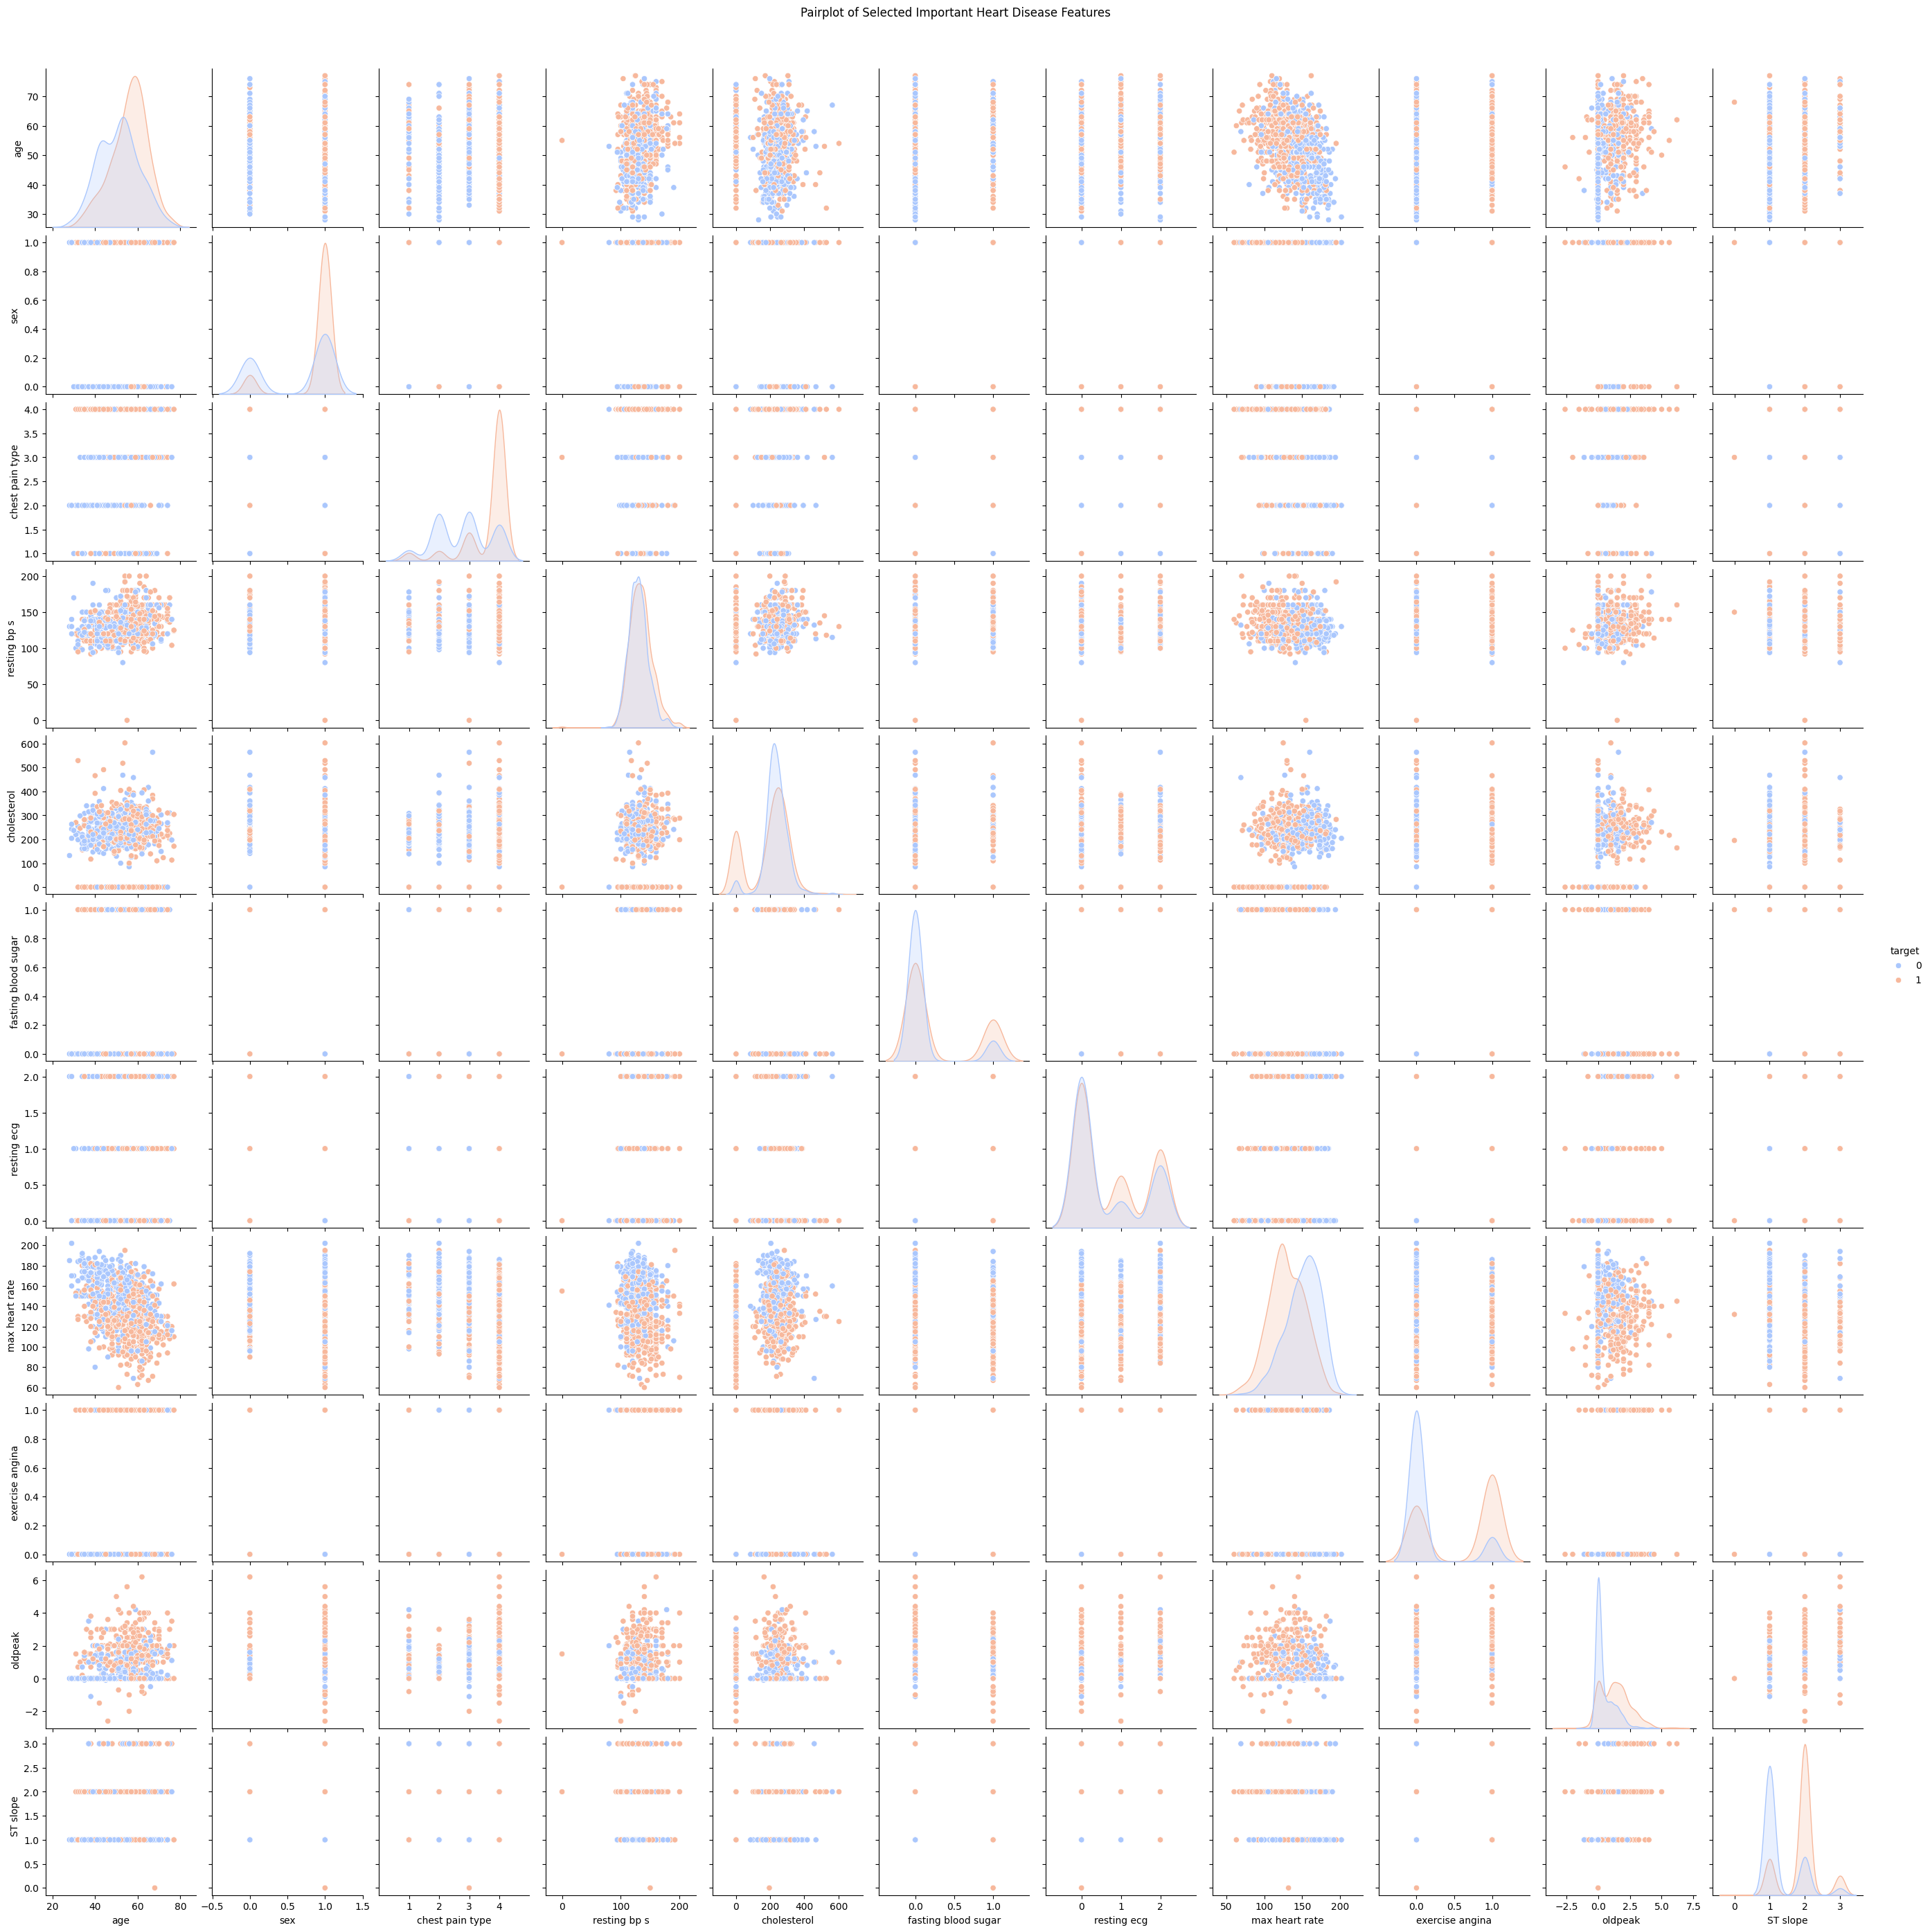

In [99]:
sns.pairplot(df, hue="target", palette="coolwarm", diag_kind="kde")
plt.suptitle("Pairplot of Selected Important Heart Disease Features", y=1.02)
plt.show()

In [100]:
df["cholesterol"] = df["cholesterol"].replace(0, np.nan)
df["resting bp s"] = df["resting bp s"].replace(0, np.nan)
df["ST slope"] = df["ST slope"].replace(0, np.nan)

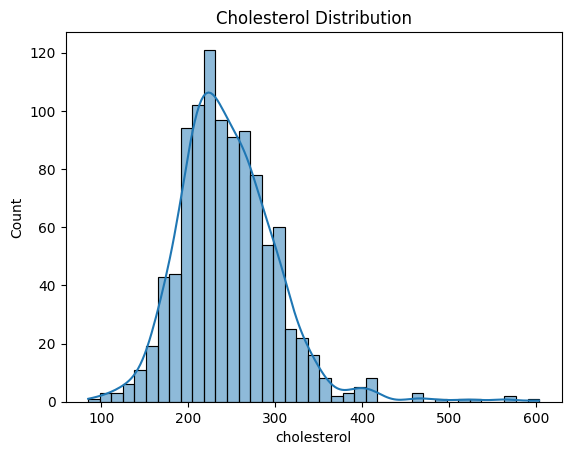

In [101]:
sns.histplot(df["cholesterol"], kde=True)
plt.title("Cholesterol Distribution")
plt.show()

In [102]:
df["cholesterol"] = df["cholesterol"].fillna(df["cholesterol"].median())
df['resting bp s'] = df['resting bp s'].fillna(df['resting bp s'].mean())
df['ST slope'] = df['ST slope'].fillna(df['ST slope'].mode()[0])

In [103]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.264929,245.052941,0.213445,0.698319,139.732773,0.387395,0.922773,1.626050,0.528571
std,9.358203,0.424884,0.935480,17.964210,52.983213,0.409912,0.870359,25.517636,0.487360,1.086337,0.608734,0.499393
min,28.000000,0.000000,1.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,214.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,240.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [104]:
df['chest pain type'].value_counts()

,count
chest pain type,
4,625
3,283
2,216
1,66


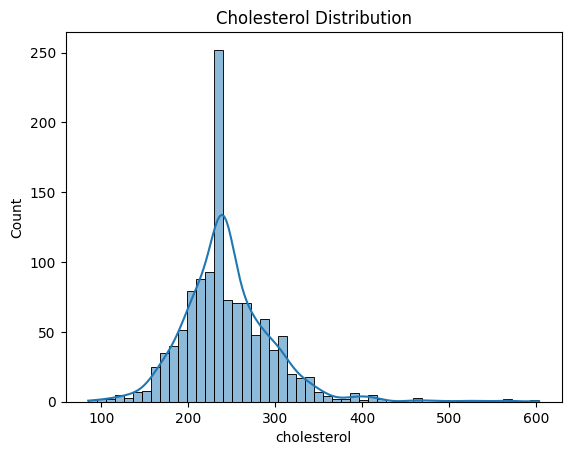

In [105]:
sns.histplot(df["cholesterol"], kde=True)
plt.title("Cholesterol Distribution")
plt.show()

<Axes: >

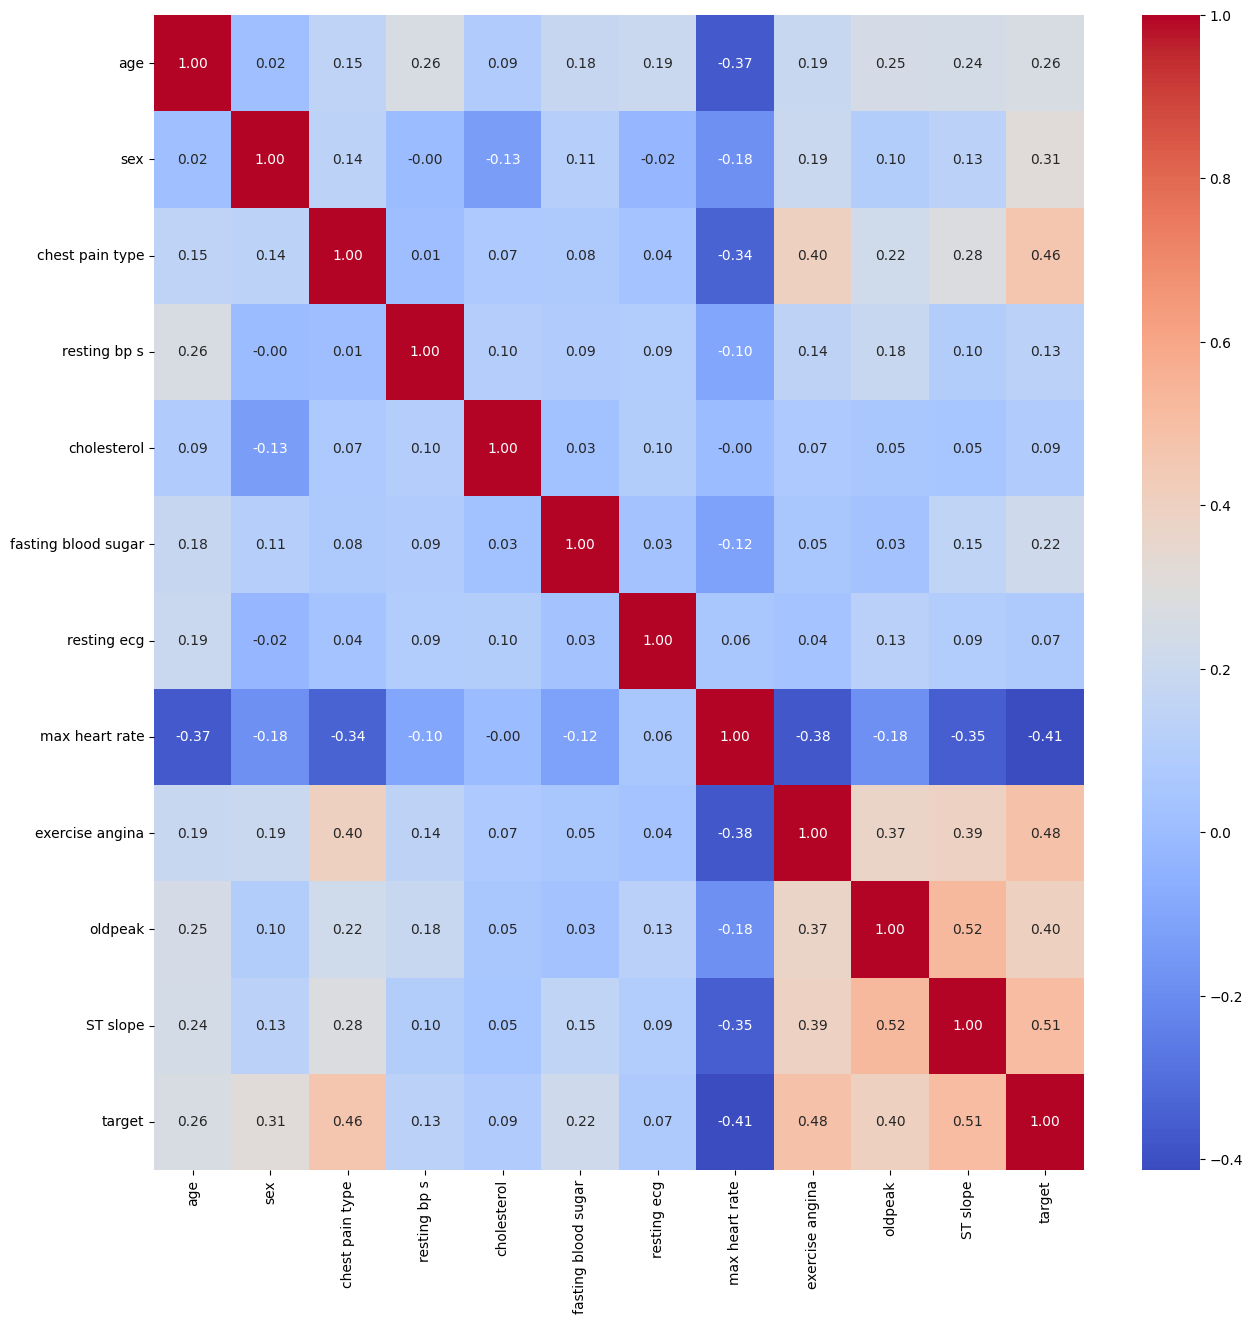

In [106]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

In [107]:
corr

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,0.015096,0.149055,0.264343,0.087369,0.178923,0.194595,-0.368676,0.188095,0.245093,0.242639,0.262029
sex,0.015096,1.000000,0.138405,-0.003146,-0.133455,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.129811,0.311267
chest pain type,0.149055,0.138405,1.000000,0.008138,0.071443,0.076492,0.035705,-0.337491,0.403428,0.224106,0.277046,0.460127
resting bp s,0.264343,-0.003146,0.008138,1.000000,0.103031,0.086998,0.093051,-0.099935,0.140721,0.183368,0.098206,0.129995
cholesterol,0.087369,-0.133455,0.071443,0.103031,1.000000,0.026974,0.100109,-0.000027,0.072099,0.051348,0.046953,0.086290
fasting blood sugar,0.178923,0.110961,0.076492,0.086998,0.026974,1.000000,0.032124,-0.118689,0.053053,0.031193,0.151618,0.216695
resting ecg,0.194595,-0.022225,0.035705,0.093051,0.100109,0.032124,1.000000,0.058812,0.037821,0.126023,0.091677,0.073059
max heart rate,-0.368676,-0.181837,-0.337491,-0.099935,-0.000027,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.352581,-0.413278
exercise angina,0.188095,0.194380,0.403428,0.140721,0.072099,0.053053,0.037821,-0.377691,1.000000,0.370772,0.392327,0.481467
oldpeak,0.245093,0.096390,0.224106,0.183368,0.051348,0.031193,0.126023,-0.183688,0.370772,1.000000,0.523779,0.398385


In [108]:
correlation = df.corr()['target'].drop('target')
correlation.sort_values(ascending=False)

,target
ST slope,0.509649
exercise angina,0.481467
chest pain type,0.460127
oldpeak,0.398385
sex,0.311267
age,0.262029
fasting blood sugar,0.216695
resting bp s,0.129995
cholesterol,0.086290
resting ecg,0.073059


In [109]:
df = df.drop(columns=['oldpeak'])

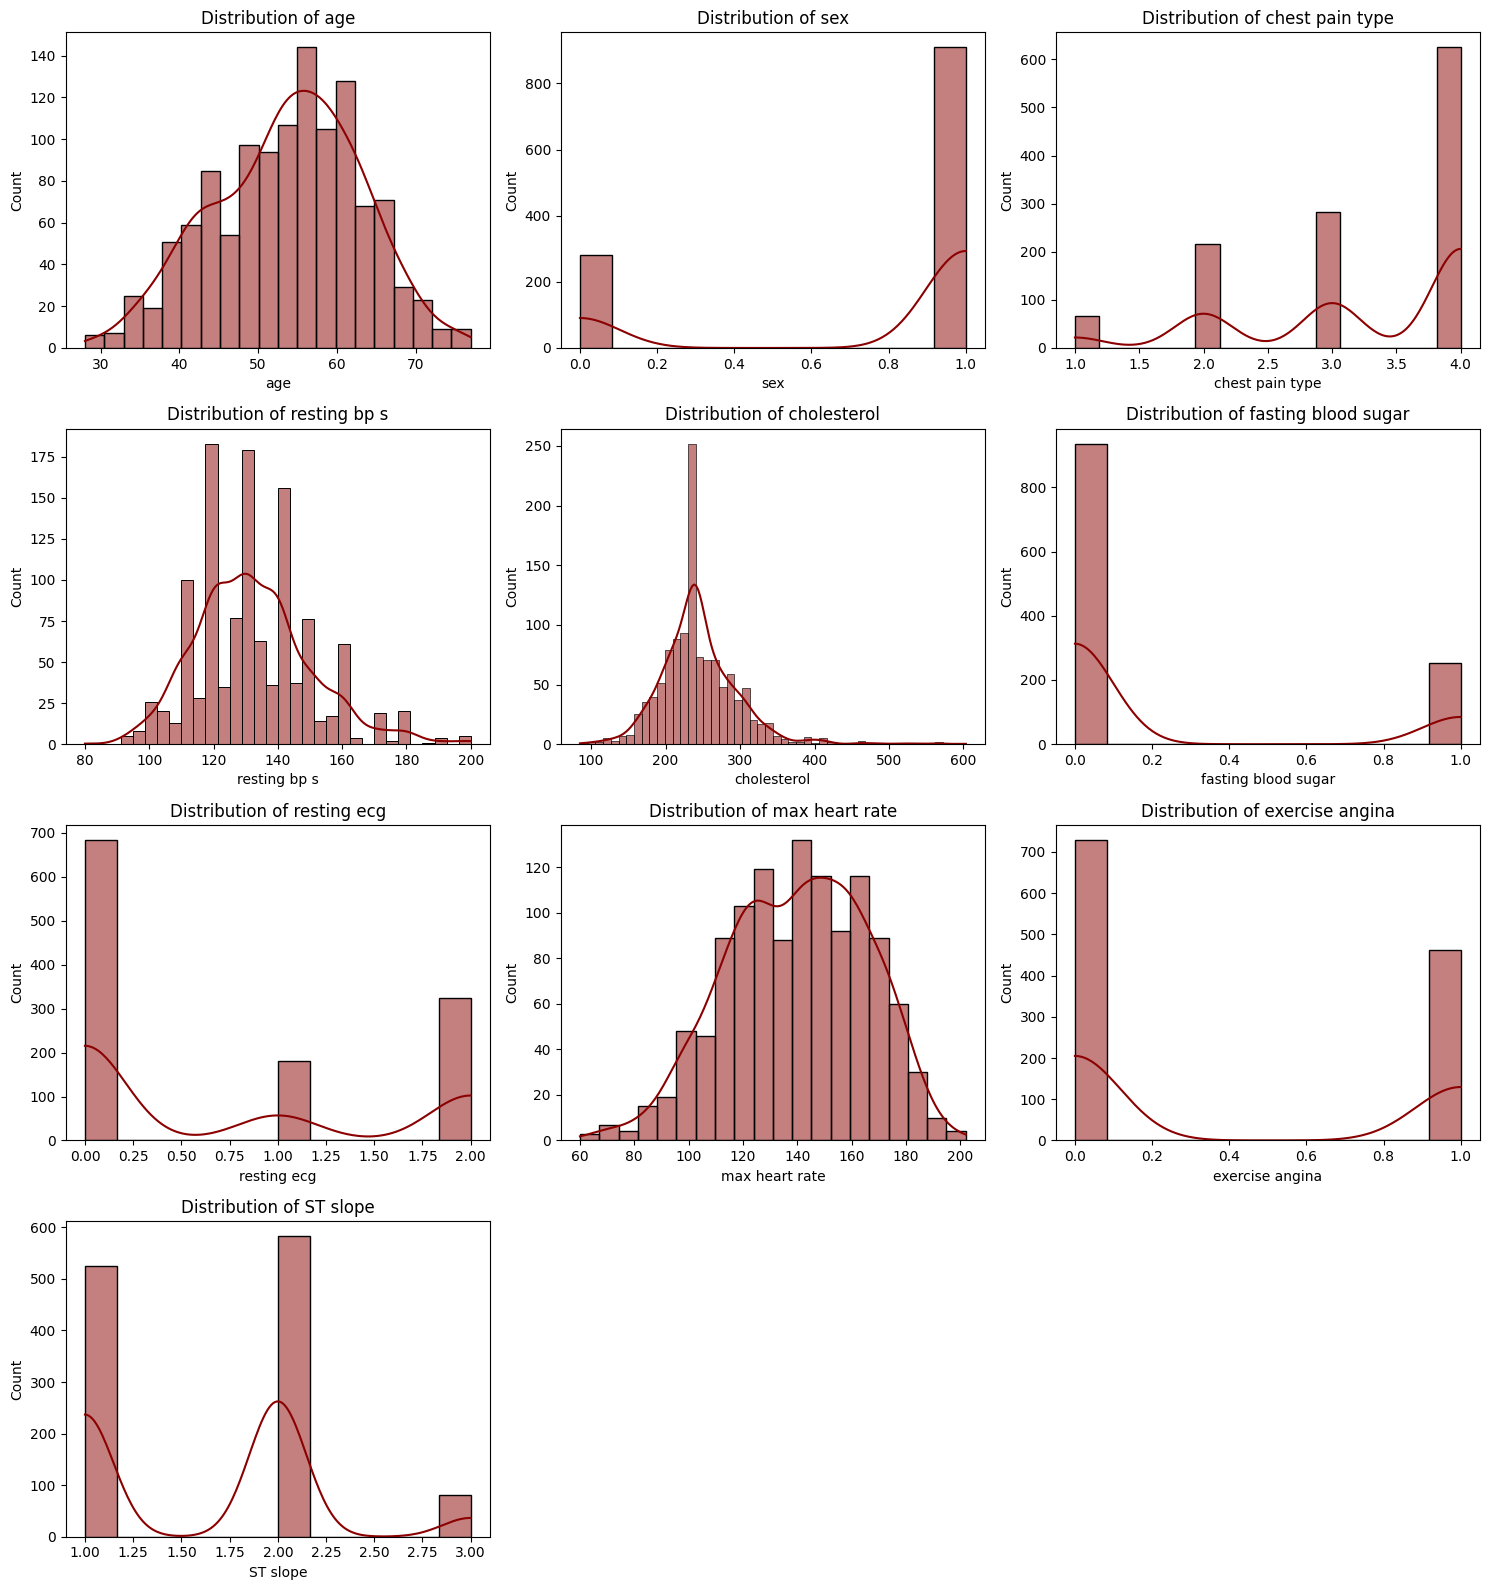

In [110]:
cols = [col for col in df.columns if col != 'target']

num_features = len(cols)
cols_per_row = 3
rows = (num_features + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row * 5, rows * 4))

for i, col in enumerate(cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.histplot(df[col].dropna(), kde=True, color='darkred')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [111]:
df['cholesterol'] = np.log1p(df['cholesterol'])
df['resting bp s'] = np.sqrt(df['resting bp s'])


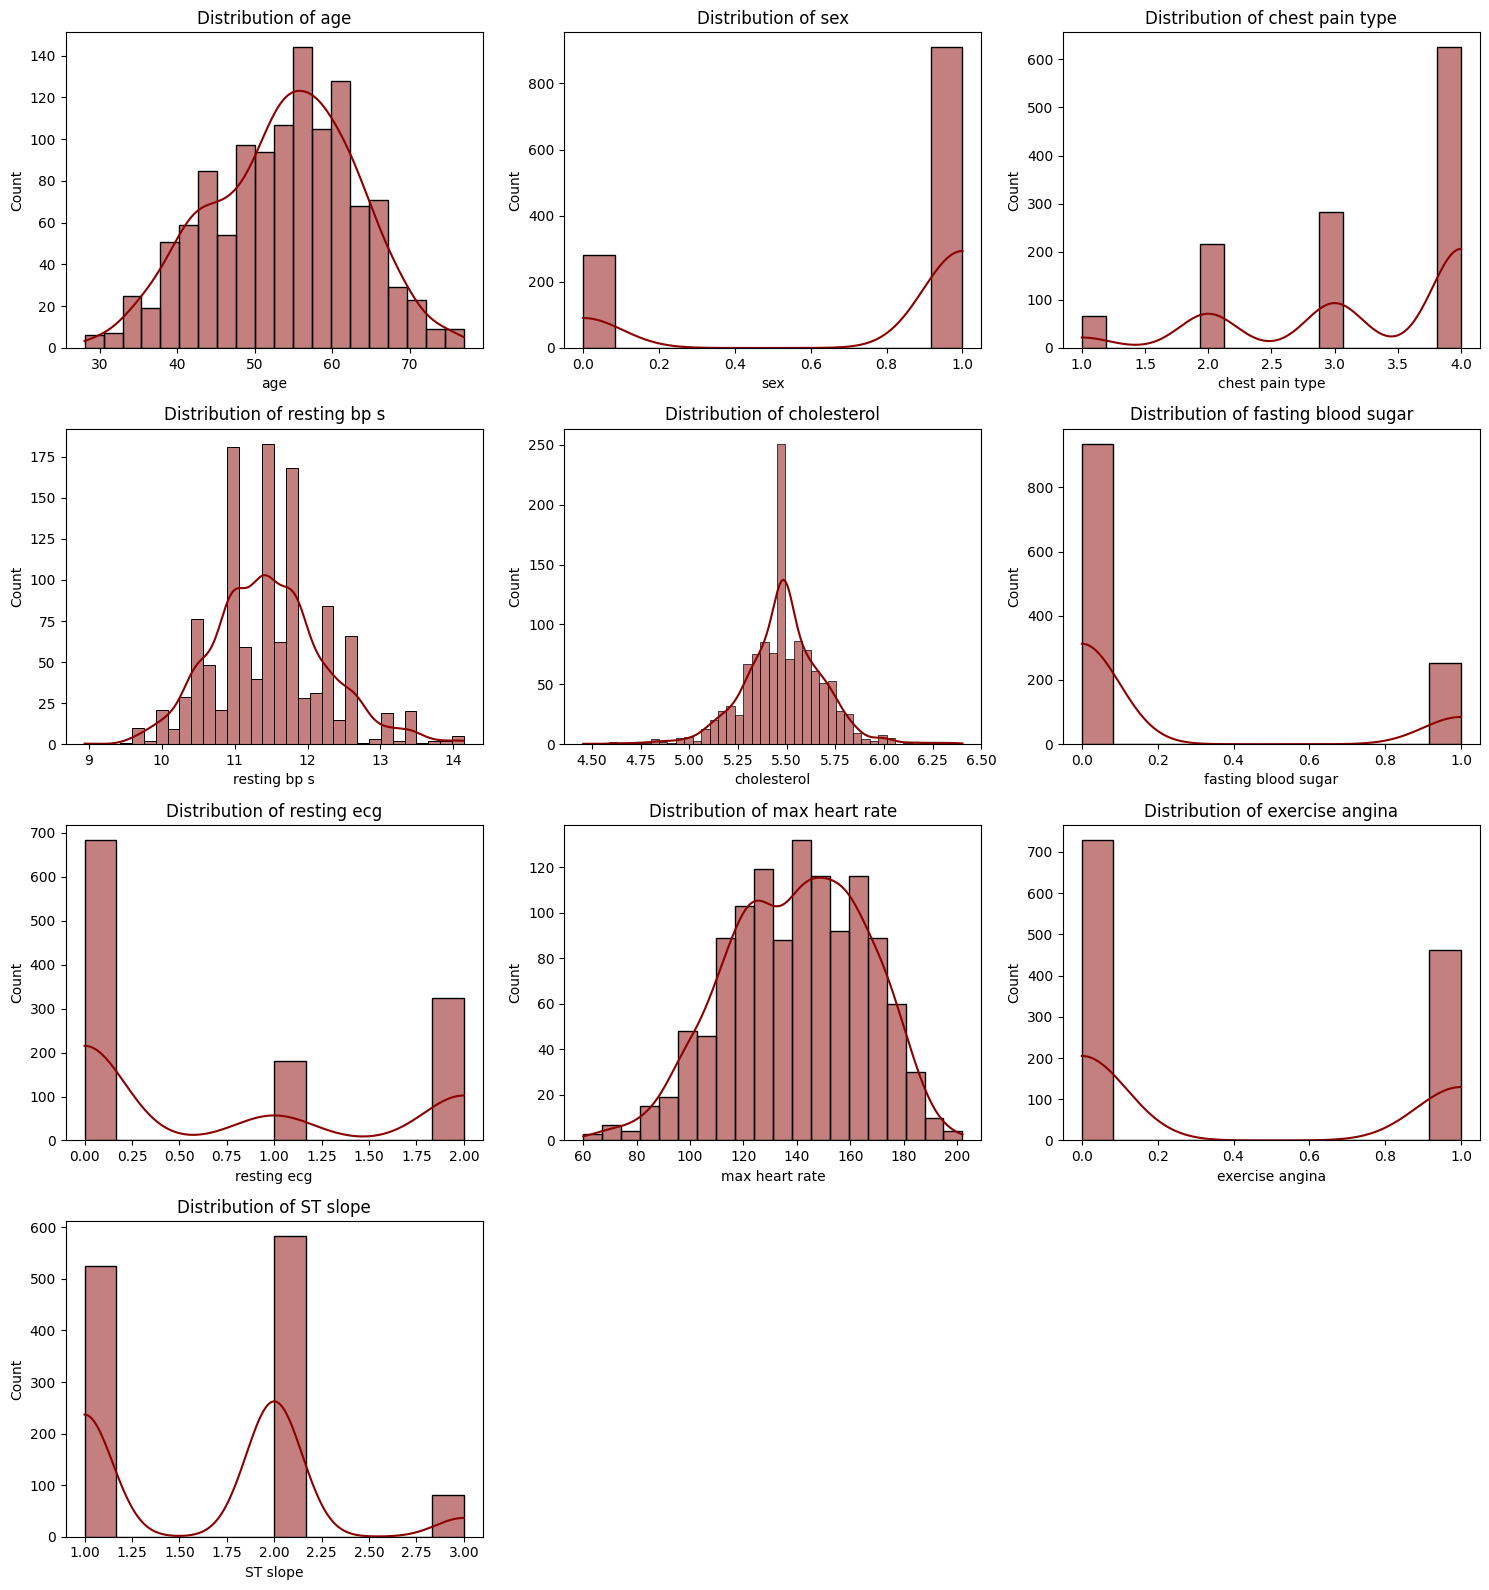

In [112]:
cols = [col for col in df.columns if col != 'target']

num_features = len(cols)
cols_per_row = 3
rows = (num_features + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row * 5, rows * 4))

for i, col in enumerate(cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.histplot(df[col].dropna(), kde=True, color='darkred')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [113]:
X = df.drop('target', axis=1)
X

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,ST slope
0,40,1,2,11.832160,5.669881,0,0,172,0,1.0
1,49,0,3,12.649111,5.198497,0,0,156,0,2.0
2,37,1,2,11.401754,5.648974,0,1,98,0,1.0
3,48,0,4,11.747340,5.370638,0,0,108,1,2.0
4,54,1,3,12.247449,5.278115,0,0,122,0,1.0
...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,10.488088,5.579730,0,0,132,0,2.0
1186,68,1,4,12.000000,5.267858,1,0,141,0,2.0
1187,57,1,4,11.401754,4.882802,0,0,115,1,2.0
1188,57,0,2,11.401754,5.468060,0,2,174,0,2.0


In [114]:
y=df['target']
y

,target
0,0
1,1
2,0
3,1
4,0
...,...
1185,1
1186,1
1187,1
1188,1


In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((833, 10), (357, 10), (833,), (357,))

In [116]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled, X_test_scaled


(array([[-1.56610611,  0.57503993,  0.81505412, ..., -0.02428744,
         -0.76791579,  0.64701627],
        [ 0.87789707, -1.73900966,  0.81505412, ...,  0.17682032,
         -0.76791579,  2.29522591],
        [ 0.77163606,  0.57503993,  0.81505412, ..., -1.31137713,
          1.30222612,  2.29522591],
        ...,
        [ 0.77163606,  0.57503993, -2.33304517, ...,  0.17682032,
         -0.76791579,  0.64701627],
        [ 0.87789707, -1.73900966,  0.81505412, ...,  0.78014361,
         -0.76791579,  2.29522591],
        [-1.24732309,  0.57503993, -1.28367874, ...,  0.86058672,
         -0.76791579, -1.00119337]]),
 array([[ 0.77163606,  0.57503993,  0.81505412, ...,  0.17682032,
         -0.76791579,  0.64701627],
        [ 0.027809  ,  0.57503993, -0.23431231, ...,  0.37792808,
          1.30222612,  0.64701627],
        [ 0.13407001, -1.73900966, -1.28367874, ...,  0.57903585,
         -0.76791579, -1.00119337],
        ...,
        [ 1.72798513,  0.57503993,  0.81505412, ..., -

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42, min_samples_leaf=3, min_samples_split=2)
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=3, random_state=42)

In [119]:
y_pred = rf_model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       107
           1       0.92      0.92      0.92       131

    accuracy                           0.91       238
   macro avg       0.91      0.91      0.91       238
weighted avg       0.91      0.91      0.91       238



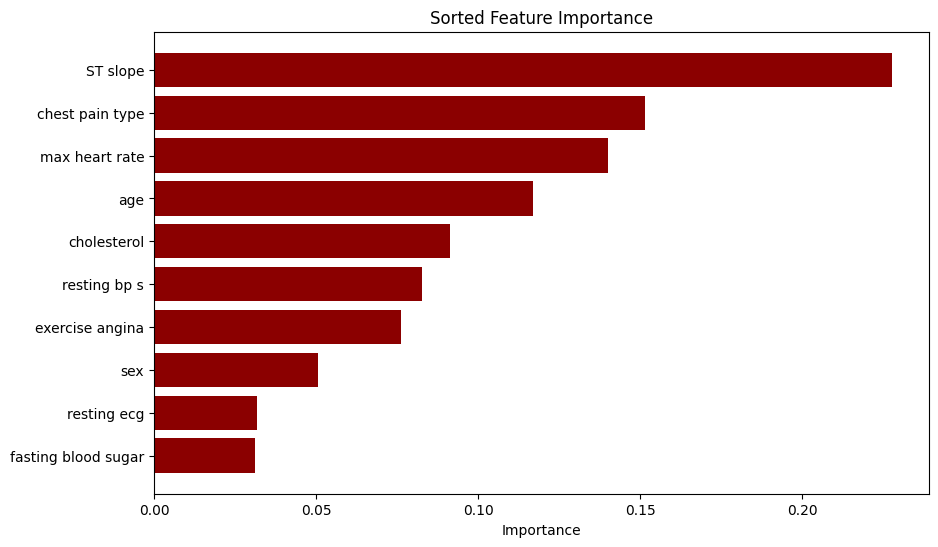

In [120]:
features = X.columns.tolist()
features_importance = rf_model.feature_importances_
feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': features_importance
})

feat_imp = feat_imp.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'], color='darkred')
plt.xlabel('Importance')
plt.title('Sorted Feature Importance')
plt.show()

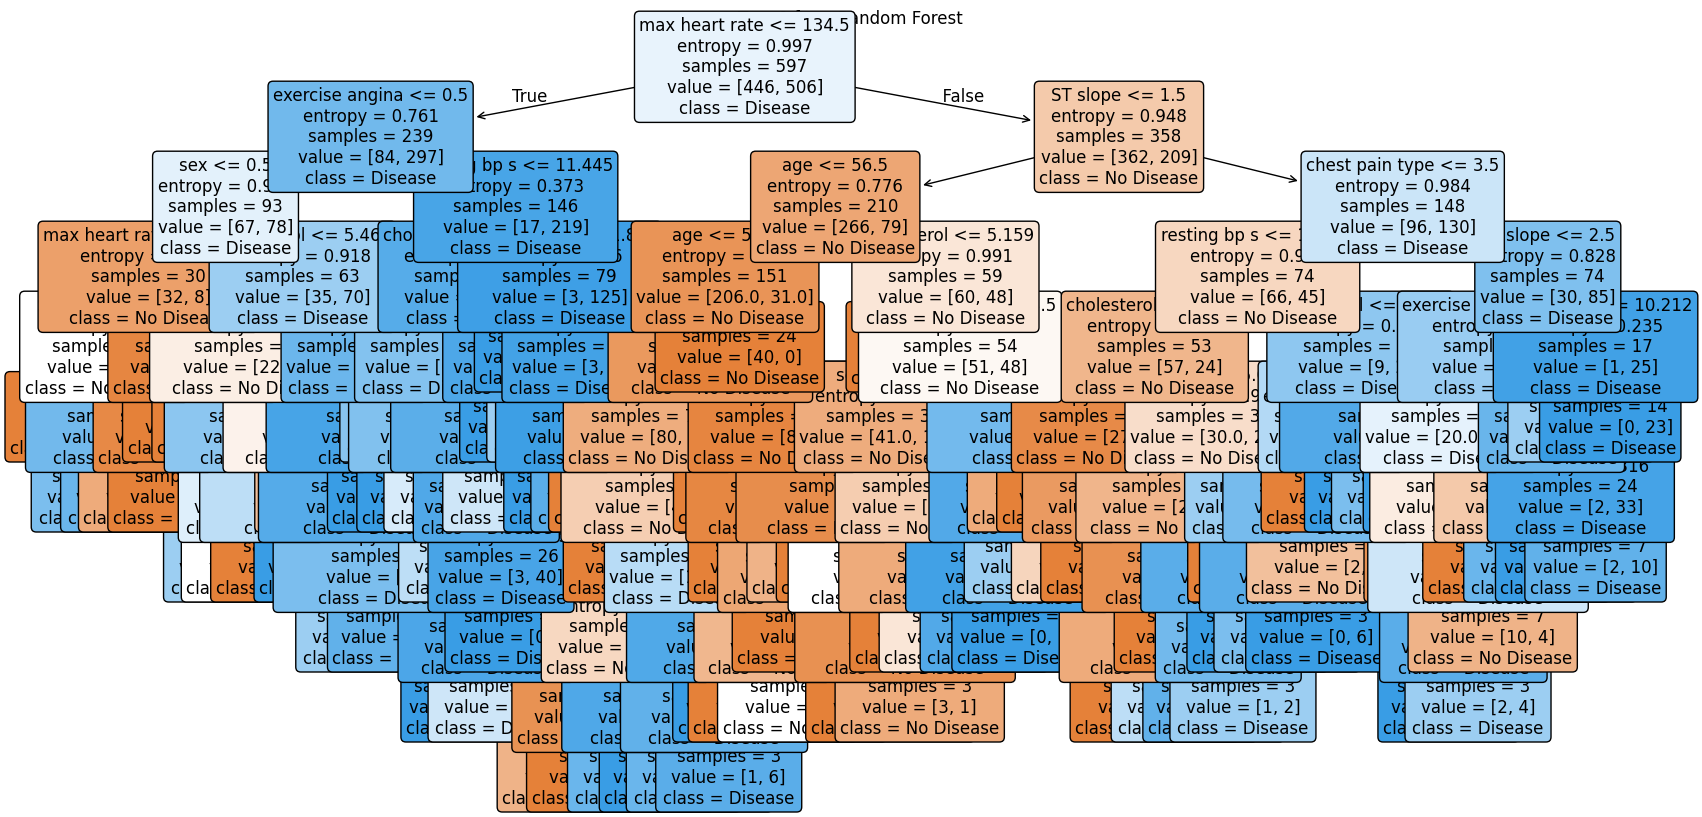

In [121]:
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0],
          feature_names=X.columns,
          class_names=["No Disease", "Disease"],
          filled=True, rounded=True, fontsize=12)
plt.title("Tree 0 from Random Forest")
plt.show()

In [122]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

ada = AdaBoostClassifier(estimator=rf_model, n_estimators=100, learning_rate=0.5, random_state=42)
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 98   9]
 [  6 125]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       107
           1       0.93      0.95      0.94       131

    accuracy                           0.94       238
   macro avg       0.94      0.94      0.94       238
weighted avg       0.94      0.94      0.94       238


Accuracy Score: 0.9369747899159664


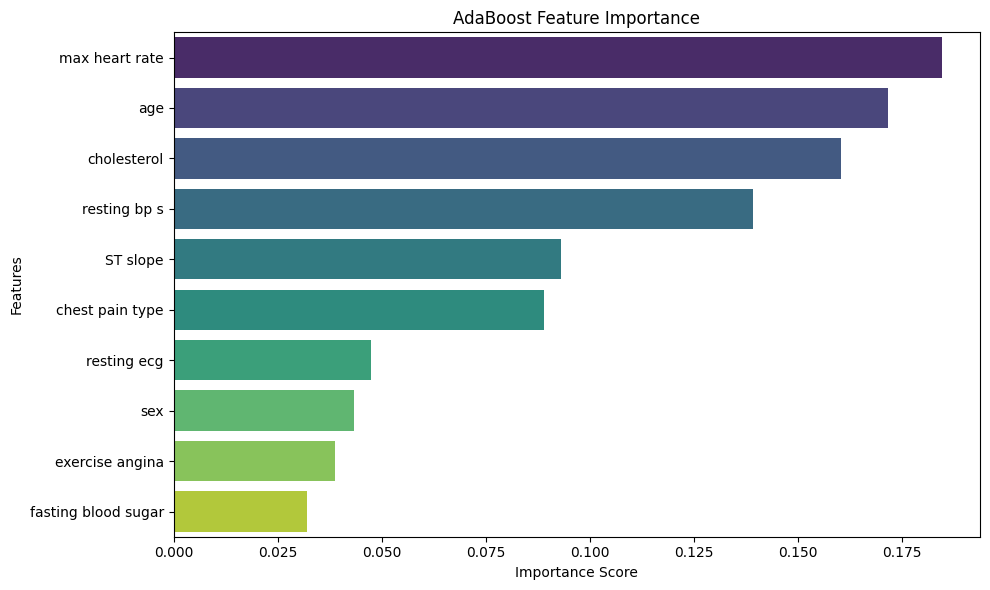

In [136]:
feature_imp = pd.Series(ada.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot( x=feature_imp.values, y=feature_imp.index, hue=feature_imp.index, palette='viridis', legend=False)
plt.title("AdaBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


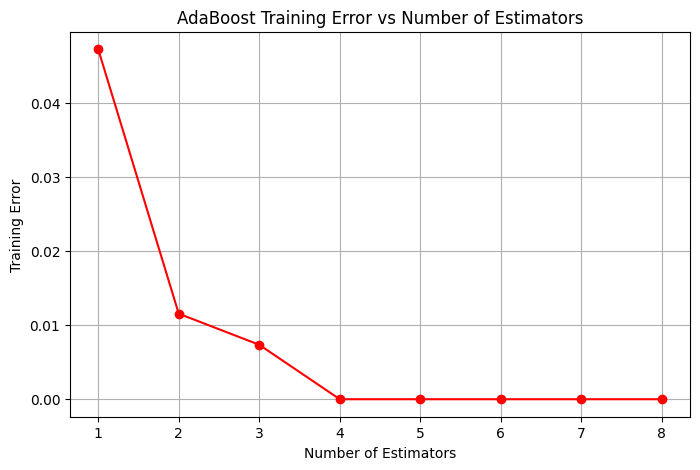

In [124]:
from sklearn.metrics import zero_one_loss

errors = []
for y_pred in ada.staged_predict(X_train):
    errors.append(zero_one_loss(y_train, y_pred))

plt.figure(figsize=(8,5))
plt.plot(range(1, len(errors)+1), errors, marker='o', color='red')
plt.title('AdaBoost Training Error vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Training Error')
plt.grid(True)
plt.show()

In [125]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 98   9]
 [ 10 121]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       107
           1       0.93      0.92      0.93       131

    accuracy                           0.92       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238


Accuracy Score: 0.9201680672268907


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:35:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


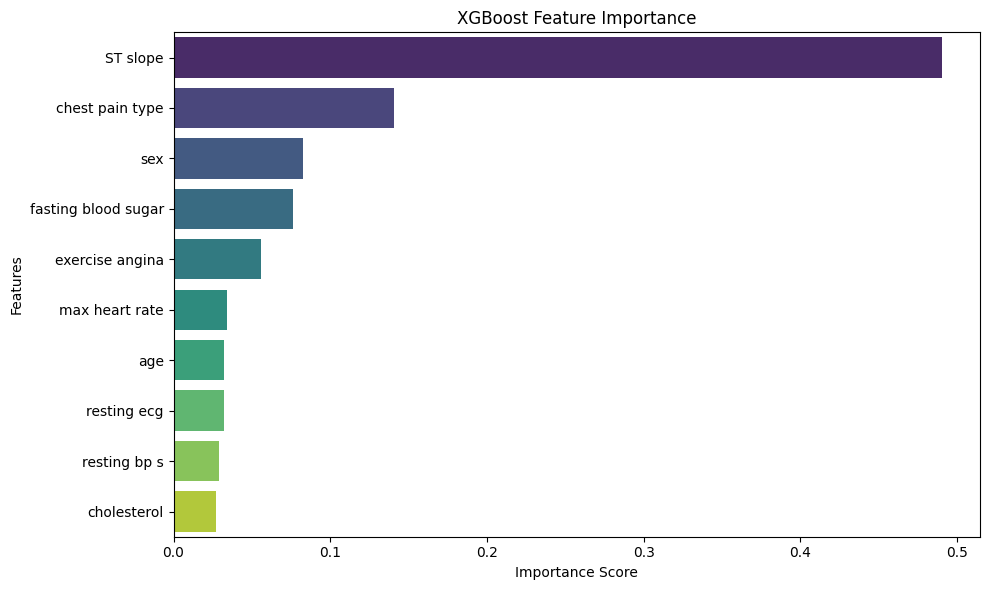

In [134]:
feature_imp = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot( x=feature_imp.values, y=feature_imp.index, hue=feature_imp.index, palette='viridis', legend=False)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [127]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(verbose=0, random_state=42)  # verbose=0 suppresses output
cat_model.fit(X_train, y_train)

y_pred = cat_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 95  12]
 [  8 123]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       107
           1       0.91      0.94      0.92       131

    accuracy                           0.92       238
   macro avg       0.92      0.91      0.91       238
weighted avg       0.92      0.92      0.92       238


Accuracy Score: 0.9159663865546218


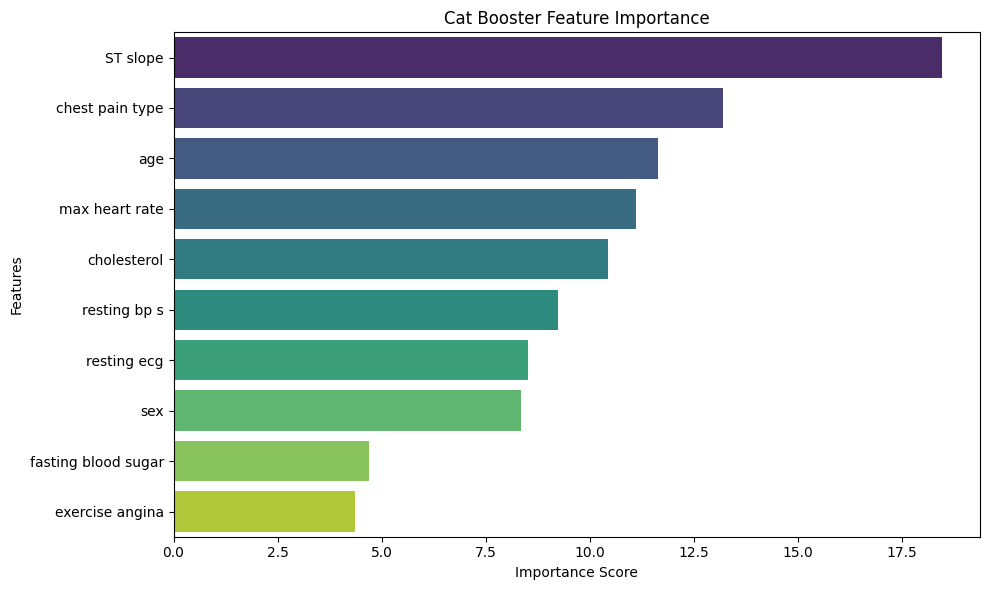

In [138]:
feature_imp = pd.Series(cat_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot( x=feature_imp.values, y=feature_imp.index, hue=feature_imp.index, palette='viridis', legend=False)
plt.title("Cat Booster Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [129]:
import lightgbm as lgb

lgbm_model = lgb.LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 498, number of negative: 454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 952, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523109 -> initscore=0.092503
[LightGBM] [Info] Start training from score 0.092503
Confusion Matrix:
 [[ 97  10]
 [  7 124]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       107
           1       0.93      0.95      0.94       131

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.9

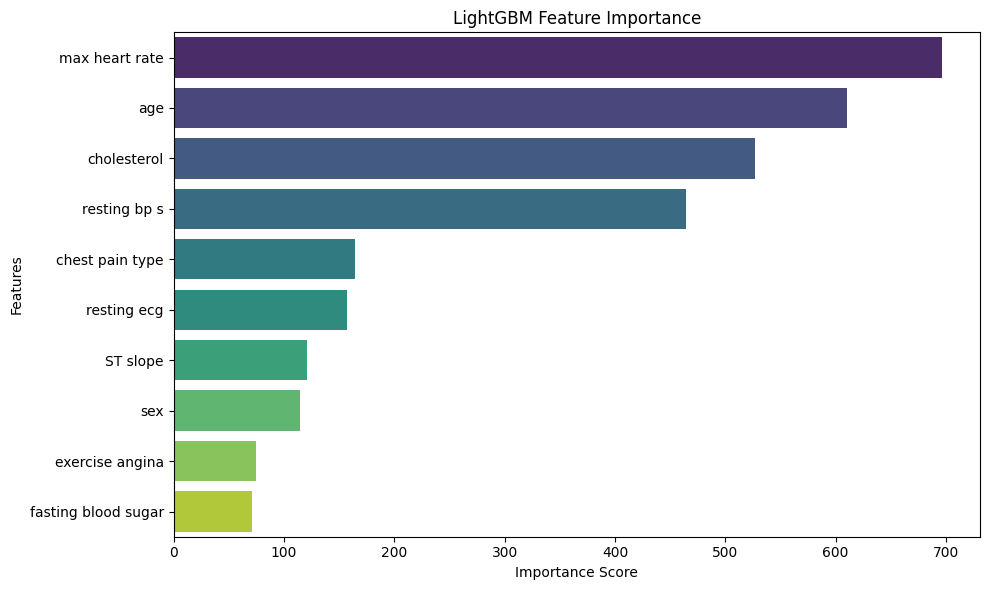

In [139]:
feature_imp = pd.Series(lgbm_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot( x=feature_imp.values, y=feature_imp.index, hue=feature_imp.index, palette='viridis', legend=False)
plt.title("LightGBM Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()